<a href="https://colab.research.google.com/github/sftSalman/CNN/blob/main/Cov_stepBystep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt


In [7]:
def zero_pad(X,pad):
  X_pad = np.pad(X,((0,0),(pad,pad),(pad,pad),(0,0)),constant_values = 0.0)

  return X_pad

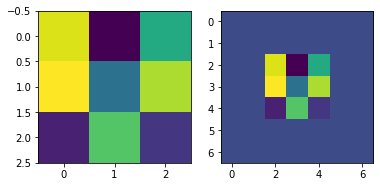

In [9]:
np.random.seed(1)
x = np.random.randn(4,3,3,2)
x_pad = zero_pad(x,2)

fig , ax = plt.subplots(1,2)
ax[0].imshow(x[0,:,:,0])
ax[1].imshow(x_pad[0,:,:,0])

In [ ]:
x = np.random.randn(4,3,3,2)|

In [ ]:
print(x[,:,:0])

[]


In [ ]:
x

array([[[[ 0.16003707,  0.87616892],
         [ 0.31563495, -2.02220122],
         [-0.30620401,  0.82797464]],

        [[ 0.23009474,  0.76201118],
         [-0.22232814, -0.20075807],
         [ 0.18656139,  0.41005165]],

        [[ 0.19829972,  0.11900865],
         [-0.67066229,  0.37756379],
         [ 0.12182127,  1.12948391]]],


       [[[ 1.19891788,  0.18515642],
         [-0.37528495, -0.63873041],
         [ 0.42349435,  0.07734007]],

        [[-0.34385368,  0.04359686],
         [-0.62000084,  0.69803203],
         [-0.44712856,  1.2245077 ]],

        [[ 0.40349164,  0.59357852],
         [-1.09491185,  0.16938243],
         [ 0.74055645, -0.9537006 ]]],


       [[[-0.26621851,  0.03261455],
         [-1.37311732,  0.31515939],
         [ 0.84616065, -0.85951594]],

        [[ 0.35054598, -1.31228341],
         [-0.03869551, -1.61577235],
         [ 1.12141771,  0.40890054]],

        [[-0.02461696, -0.77516162],
         [ 1.27375593,  1.96710175],
         [-1.85798

In [41]:
def conv_single_step(a_slice_prev,W,b):

  s = np.multiply(a_slice_prev,W)
  m = np.sum(s)
  Z = m + float(b)
  return Z

In [42]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.999089450680221


In [60]:
def conv_forward(A_prev,W,b,hparameters):

  (m,n_H_prev,n_W_prev,n_C_prev)= A_prev.shape
  #(f,f,prev_C,n_C) = W.shape
  (f, f, n_C_prev, n_C) = W.shape

  stride = hparameters['stride']
  pad = hparameters['pad']

  #n_H = int((n_H -f + 2 * pad/stride) + 1 )
  #n_W = int((n_W -f + 2 * pad /stride)+ 1)
  n_H = int((n_H_prev - f + 2 * pad) / stride + 1)
  n_W = int((n_W_prev - f + 2 * pad) / stride + 1)
  
  #Z = np.zeros((m,n_H,n_W,n_C))
  Z = np.zeros((m, n_H, n_W, n_C))
  #padding_input = zero_pad(prev_input,pad)
  A_prev_pad = zero_pad(A_prev, pad)

  for i in range(m):
    #input_pad = padding_input[i,:,:,:]
    a_prev_pad = A_prev_pad[i, :, :, :]  
    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):
          vert_start = h
          vert_end = vert_start + f
          horiz_start = w
          horiz_end = horiz_start + f 
          #input_conv_slice = padding_input[vert_start:vert_end,horiz_start:horiz_end,:]
          a_slice_prev = a_prev_pad[vert_start: vert_end, horiz_start: horiz_end, :]
         # Z[i,h,w,c] = conv_single_step(input_conv_slice,W[:,:,:,c],b[:,:,:,c])
          Z[i, h, w, c] = conv_single_step(a_slice_prev, W[:, :, :, c], b[:, :, :, c])

          #cache = (W,b,hparameter,prev_input)
          cache = (A_prev, b, W, hparameters)

          return cache, Z



  

In [61]:
def conv_forward(A_prev, W, b, hparameters):
#def conv_forward(A_prev,W,b,hparameters):    
   (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    #(m,n_H_prev,n_W_prev,n_C_prev)= A_prev.shape
  
    (f, f, n_C_prev, n_C) = W.shape
    #(f, f, n_C_prev, n_C) = W.shape
    
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    #stride = hparameters['stride']
    #pad = hparameters['pad']
    
  
    n_H = int((n_H_prev - f + 2 * pad) / stride + 1)
    n_W = int((n_W_prev - f + 2 * pad) / stride + 1)
    #n_H = int((n_H_prev - f + 2 * pad) / stride + 1)
    #n_W = int((n_W_prev - f + 2 * pad) / stride + 1)
    
    Z = np.zeros((m, n_H, n_W, n_C))
    #Z = np.zeros((m, n_H, n_W, n_C))
    

    A_prev_pad = zero_pad(A_prev, pad)
   # A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):                               # loop over the batch of training examples
       # a_prev_pad = A_prev_pad[i, :, :, :] 
        a_prev_pad = A_prev_pad[i, :, :, :]           # Select ith training example's padded activation
        for h in range(n_H):                           # loop over vertical axis of the output volume
            for w in range(n_W):                       # loop over horizontal axis of the output volume
                for c in range(n_C):                   # loop over channels (= #filters) of the output volume
                    
              
                   vert_start = h
                   vert_end = vert_start + f
                   horiz_start = w
                   horiz_end = horiz_start + f 
                    
                   
                    a_slice_prev = a_prev_pad[vert_start: vert_end, horiz_start: horiz_end, :]
                    #a_slice_prev = a_prev_pad[vert_start: vert_end, horiz_start: horiz_end, :]
                    
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[:, :, :, c], b[:, :, :, c])
                    #Z[i, h, w, c] = conv_single_step(a_slice_prev, W[:, :, :, c], b[:, :, :, c])
                   
   
    
   
    cache = (A_prev, b, W, hparameters)
    
    return Z, cache

IndentationError: ignored

In [59]:
np.random.seed(1)
prev_input = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 2}

Z, cache_conv = conv_forward(prev_input, W, b, hparameters)
print("Z's mean =", np.mean(Z))
print("Z[3,2,1] =", Z[3,2,1])
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

Z's mean = -0.007801972093158612
Z[3,2,1] = [ 0.10709871 -0.03102354 -0.52995452  0.98611224  0.65733641 -0.84239368
 -0.04608241  0.08802027]
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


In [53]:
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =", np.mean(Z))
print("Z[3,2,1] =", Z[3,2,1])
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


ValueError: ignored